In [3]:
import pandas as pd

# 读取Excel文件
file_path = r'C:\Users\Vivian\Desktop\Supplementary Data trait.xlsx'
# 读取Match sheet
match_df = pd.read_excel(file_path, sheet_name='Match')

# 创建一个字典，将Phenotypes映射到Phenotypes Class
phenotype_class_map = dict(zip(match_df['Phenotypes'], match_df['Phenotypes Class']))

# 读取Supplementary Data 14 sheet
supplementary_df = pd.read_excel(file_path, sheet_name='Supplementary Data 14')

# 更新Supplementary Data 14中的Phenotypes Class
# 假设Supplementary Data 14中有一个名为'Phenotypes'的列
supplementary_df['Phenotypes Class'] = supplementary_df['Phenotypes'].map(phenotype_class_map)

# 处理未找到匹配的情况（可选）
supplementary_df['Phenotypes Class'].fillna('未找到匹配', inplace=True)

# 将更新后的数据保存到新的sheet中
output_path = r'C:\Users\Vivian\Desktop\updated_supplementary.xlsx'

with pd.ExcelWriter(output_path) as writer:
    supplementary_df.to_excel(writer, sheet_name='Supplementary Data 14-1', index=False)

print("更新完成！")

C:\Users\Vivian\AppData\Local\Temp\ipykernel_27892\2845818048.py:19: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  supplementary_df['Phenotypes Class'].fillna('未找到匹配', inplace=True)


更新完成！


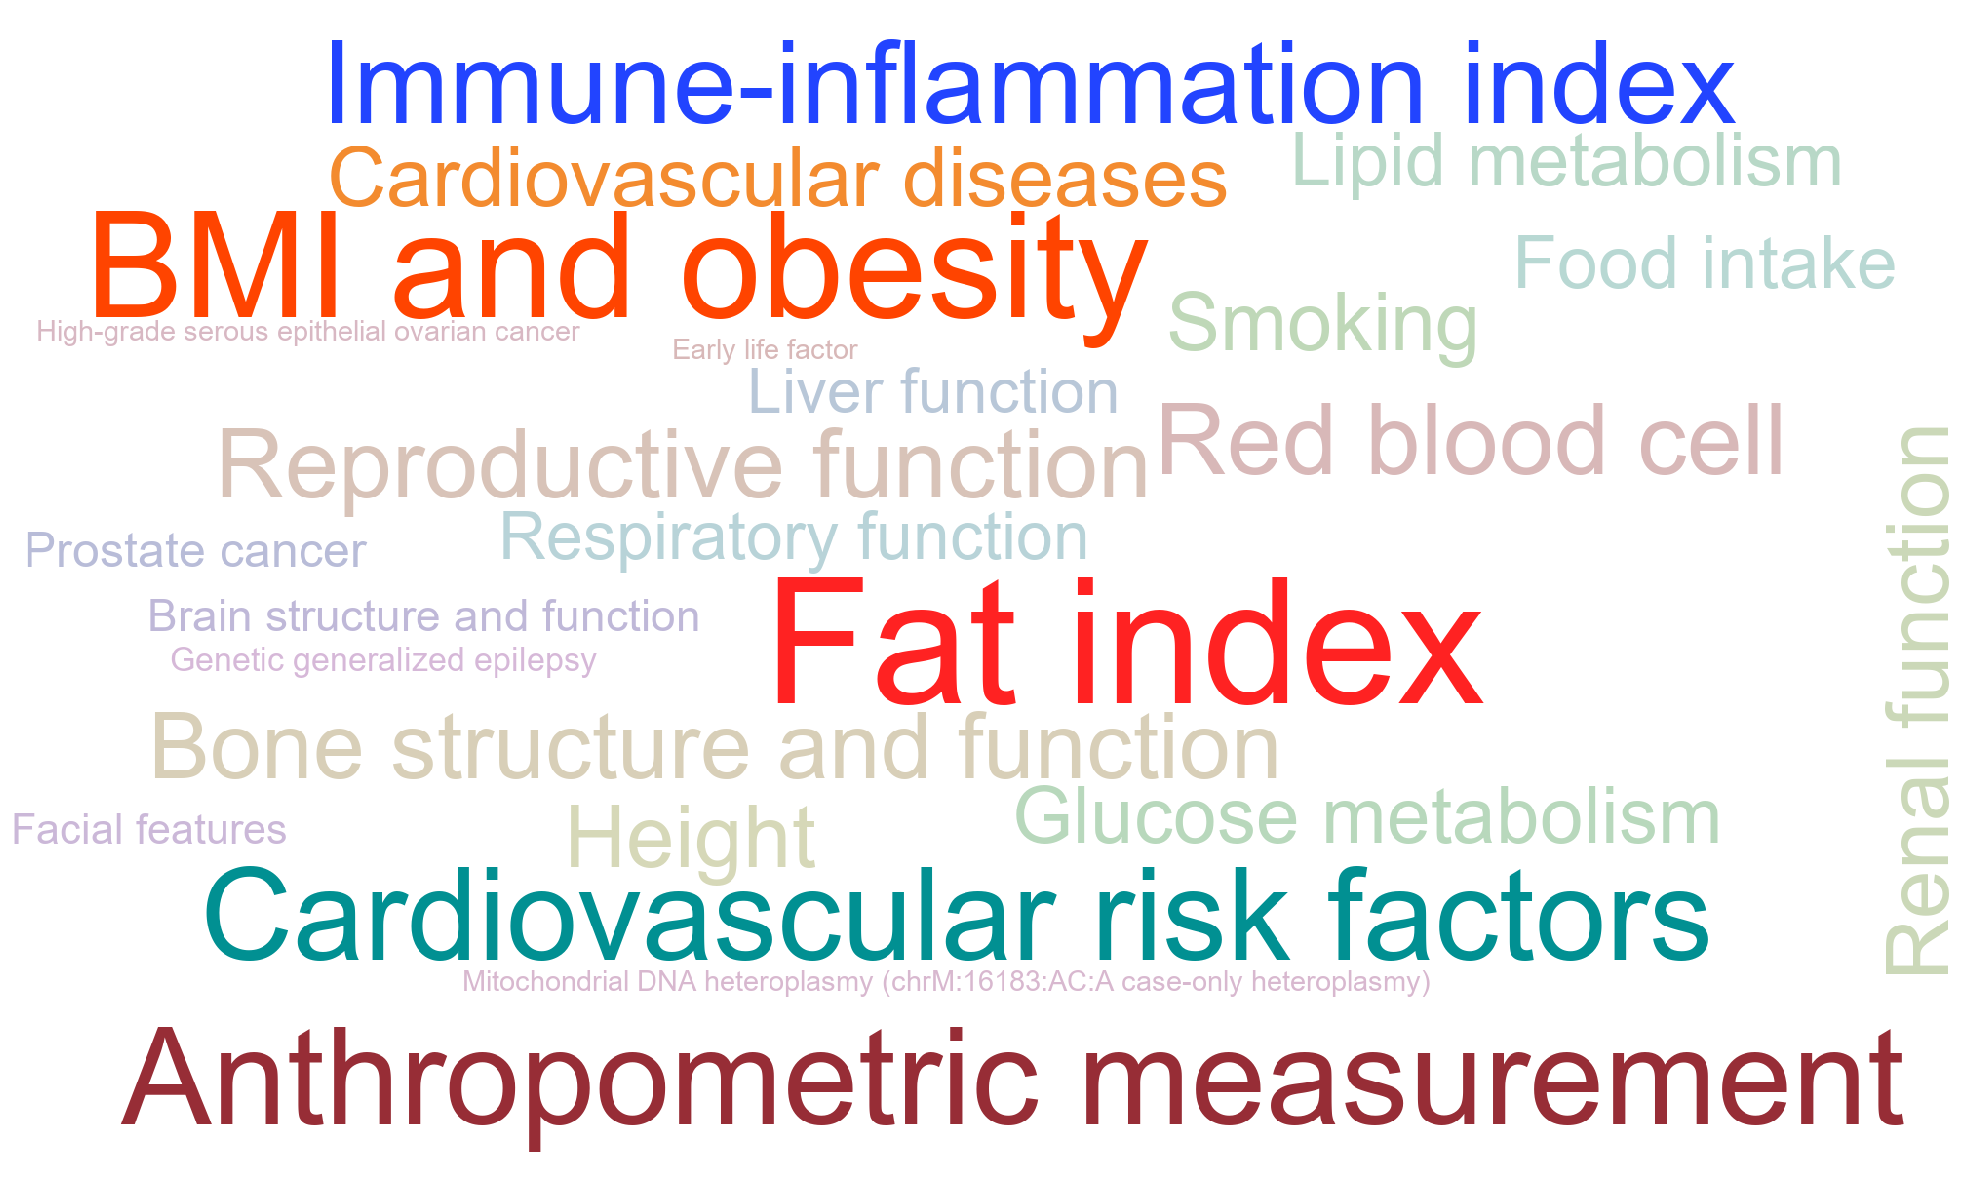

In [21]:
import pandas as pd
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import colorsys
import numpy as np

# 读取Excel文件
data = pd.read_excel("C:/Users/Vivian/Desktop/updated_supplementary.xlsx")
category_counts = data['Phenotypes Class'].value_counts()
category_dict = category_counts.to_dict()
# set colours
highlight_categories = {
    'Fat index': '#FF2222',
    'Immune-inflammation index': '#2244FF',
    'Anthropometric measurement': '#972D36',
    'Cardiovascular risk factors': '#019092',
    'BMI and obesity': '#FF4400',
    'Cardiovascular diseases': '#F38B2F',
}


# background
def generate_background_colors(n):
    colors = []
    for hue in np.linspace(0, 1, n):
        saturation = 0.15
        value = 0.85
        r, g, b = colorsys.hsv_to_rgb(hue, saturation, value)
        hex_color = f"#{int(r*255):02x}{int(g*255):02x}{int(b*255):02x}"
        colors.append(hex_color)
    return colors

# colour setting
all_categories = list(category_dict.keys())
background_colors = generate_background_colors(len(all_categories) - len(highlight_categories))

color_overrides = {}
bg_color_idx = 0  

for category in all_categories:
    if category in highlight_categories:
        color_overrides[category] = highlight_categories[category]
    else:
        color_overrides[category] = background_colors[bg_color_idx]
        bg_color_idx += 1  

# produce wordcloud
wordcloud = WordCloud(
    width=2000,
    height=1200,
    font_path='C:/Users/Vivian/Desktop/Arial Font/Arial.ttf',
    background_color="white",
    max_words=200,
    prefer_horizontal=0.8,
    relative_scaling=0.3,
    min_font_size=12,
    max_font_size=180,
    colormap=None
).generate_from_frequencies(category_dict)

# save as PDF
plt.figure(figsize=(20, 12))
plt.imshow(wordcloud.recolor(color_func=lambda word, **kwargs: color_overrides[word]), interpolation="none")
plt.axis("off")
plt.tight_layout()
plt.savefig("wordcloud.pdf", format="pdf", bbox_inches="tight", dpi=300)
plt.show()


In [7]:
pip install wordcloud

Note: you may need to restart the kernel to use updated packages.
